In [3]:
import pandas as pd 

x = pd.read_csv('pmdata/p01/pmsys/injury.csv')
x.head()

,effective_time_frame,injuries
0,2019-11-07T06:39:48.428Z,{}
1,2019-11-11T13:47:05.617Z,{}
2,2019-11-18T08:28:53.208Z,{}
3,2019-11-25T08:10:11.478Z,{}
4,2019-12-02T08:10:19.841Z,{}


In [13]:
import json
import pandas as pd

# Load JSON file
with open('/home/xd/Documents/code/athledai/pmdata/p01/fitbit/distance.json', 'r') as file:
    f = json.load(file)

# Ensure data is a list
if not isinstance(f, list):
    raise ValueError("Expected a list of dictionaries in JSON file.")

# Convert to DataFrame
df = pd.DataFrame(f)

# Convert dateTime to pandas datetime format
df['dateTime'] = pd.to_datetime(df['dateTime'])

# Convert value column to integer (handling possible string format)
df['value'] = pd.to_numeric(df['value'], errors='coerce').fillna(0).astype(int)

# Extract only the date (removing time part)
df['date'] = df['dateTime'].dt.date

# Group by date and sum values
result = df.groupby('date', as_index=False)['value'].sum()
result['value'] = round(result['value'] / 100)

# Display the first few rows
print(result.head(20))


          date    value
0   2019-11-01  14424.0
1   2019-11-02  10585.0
2   2019-11-03  11461.0
3   2019-11-04   8860.0
4   2019-11-05  13715.0
5   2019-11-06   6522.0
6   2019-11-07   7048.0
7   2019-11-08  10369.0
8   2019-11-09  13287.0
9   2019-11-10  14367.0
10  2019-11-11  10825.0
11  2019-11-12   8392.0
12  2019-11-13   9021.0
13  2019-11-14  15472.0
14  2019-11-15  15022.0
15  2019-11-16  12360.0
16  2019-11-17   9602.0
17  2019-11-18   7068.0
18  2019-11-19   5718.0
19  2019-11-20   8112.0


In [318]:
import json
import pandas as pd
import os

main_folder_path = "./pmdata"
sleep = []

# Iterate through the 16 main folders
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name, 'fitbit')

    # Check if the subfolder exists
    if os.path.exists(folder_path):
        file_path = os.path.join(folder_path, 'sleep.json')
        
        if os.path.exists(file_path):
            with open(file_path, 'r') as json_file:
                # Load JSON data from the file
                json_data = json.load(json_file)
                # Add the data to the dictionary with the folder number as the key
                df = pd.DataFrame(json_data)
                df['user_id']= folder_name
                sleep.append(df)

# Combine all data
result = pd.concat(sleep, ignore_index=True).sort_values(by=['user_id']).reset_index(drop=True)

# Convert dateTime to pandas datetime format
result['date'] = pd.to_datetime(result['dateOfSleep']).dt.date

# Convert value column to integer (handling possible string format)
result['sleep'] = round(pd.to_numeric(result['minutesAsleep'], errors='coerce').astype(int)/60, 2)

# Extract only the date (removing time part)
result['sleep_quality'] = pd.to_numeric(result['efficiency'], errors='coerce').astype(int)
result = result[['user_id', 'date', 'sleep', 'sleep_quality']].sort_values(by=['date'])

result = result.drop_duplicates(subset=['date', 'user_id'], keep='last')
result.dropna()

# Display the first few rows
print(result.head(20))
result.to_csv("sleep.csv", index=False)

# result.info()
sleep = result
result.describe()

     user_id        date  sleep  sleep_quality
2008     p16  2019-11-01   6.38             91
1275     p09  2019-11-01   4.85             93
360      p03  2019-11-01   2.10             93
359      p03  2019-11-02   6.13             89
688      p05  2019-11-02   5.05             96
2009     p16  2019-11-02   6.62             94
828      p06  2019-11-02   8.05             98
140      p01  2019-11-02   6.30             97
2010     p16  2019-11-03   5.70             92
138      p01  2019-11-03   6.30             96
618      p05  2019-11-03   3.73             89
1276     p09  2019-11-03   6.22             96
829      p06  2019-11-03   5.42             95
830      p06  2019-11-04   6.52             97
118      p01  2019-11-04   6.02             96
1277     p09  2019-11-04   5.07             96
2011     p16  2019-11-04   8.83             89
2012     p16  2019-11-05   8.20             92
831      p06  2019-11-05   6.57             98
132      p01  2019-11-05   5.43             99


,sleep,sleep_quality
count,1881.000000,1881.000000
mean,6.628017,94.470494
std,1.670824,4.033544
min,0.650000,0.000000
25%,5.930000,93.000000
50%,6.750000,95.000000
75%,7.600000,97.000000
max,13.720000,100.000000


In [30]:
import json
import pandas as pd

# Load JSON file
with open('/home/xd/Documents/code/athledai/pmdata/p01/fitbit/heart_rate.json', 'r') as file:
    f = json.load(file)

# Ensure data is a list
if not isinstance(f, list):
    raise ValueError("Expected a list of dictionaries in JSON file.")

# Convert to DataFrame
df = pd.DataFrame(f)
result = pd.DataFrame()

# Convert dateTime to pandas datetime format
df['dateTime'] = pd.to_datetime(df['dateTime'])
df['bpm'] = df['value'].apply(lambda x: x['bpm'])
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce').fillna(0).astype(int)

df['date'] = df['dateTime'].dt.date

result = df.groupby('date', as_index=False)['bpm'].max()
result = result.drop_duplicates(subset=['date'], keep='first')
result = result.dropna()

# Display the first few rows
result.head(20)


,date,bpm
0,2019-11-01,140
1,2019-11-02,122
2,2019-11-03,132
3,2019-11-04,126
4,2019-11-05,163
5,2019-11-06,125
6,2019-11-07,143
7,2019-11-08,129
8,2019-11-09,117
9,2019-11-10,140


In [275]:
import pandas as pd
import os

main_folder_path = "./pmdata"
alcohol = []

# Iterate through the 16 main folders
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name, 'googledocs')

    # Check if the subfolder exists
    if os.path.exists(folder_path):
        file_path = os.path.join(folder_path, 'reporting.csv')
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['user_id'] = folder_name
            alcohol.append(df)

# print(alcohol[6])
# Combine all data
x = pd.concat(alcohol, ignore_index=True).sort_values(by=['user_id']).reset_index(drop=True)
x = x.drop(columns=['date'])
x['date'] = pd.to_datetime(x['timestamp'], dayfirst=True).dt.date
x = x.drop(columns=['timestamp'])
x = x.drop_duplicates(subset=['user_id', 'date'], keep='last')

x = x[x['alcohol_consumed'] != "Maybe"]
x = x[x['alcohol_consumed'] != "Do not want to provide this information"]
x.value_counts('alcohol_consumed')

# # Convert timestamp to date and drop duplicates
# x['date'] = pd.to_datetime(x['timestamp'], format='%d/%m/%Y %H:%M:%S').dt.date
x = x.drop(columns=['meals', 'glasses_of_fluid'])

# # Fill missing weight values with the mean weight for each user_id
x['weight'] = x.groupby('user_id')['weight'].transform(lambda grp: int(grp.mean()))

# # Display results
x.dropna()
# x.info()
# x.head()
x.value_counts('alcohol_consumed')
alcohol = x
x.to_csv("alcholc.csv", index=False)

print(x)
x.describe()


      weight alcohol_consumed user_id        date
0        100               No     p01  2020-03-19
1        100               No     p01  2019-12-23
3        100               No     p01  2019-11-23
4        100               No     p01  2019-11-24
5        100               No     p01  2019-11-25
...      ...              ...     ...         ...
1563      64               No     p16  2019-12-08
1565      64               No     p16  2019-12-10
1566      64              Yes     p16  2019-12-11
1567      64               No     p16  2019-11-28
1568      64               No     p16  2020-03-18

[1181 rows x 4 columns]


,weight
count,1181.000000
mean,79.784928
std,14.598856
min,58.000000
25%,67.000000
50%,73.000000
75%,94.000000
max,100.000000


In [154]:
user_data = pd.read_excel(r'/home/xd/Documents/code/athledai/pmdata/participant-overview.xlsx', parse_dates=['Date'], header=1)
user_data.head()
user_data.describe()
user_data.rename(columns={'Participant ID': 'user_id'}, inplace=True)
user_data.rename(columns={'Max heart rate': 'MaxHR'}, inplace=True)
user_data = user_data.drop(columns=['A or B person', 'Date', 'Minutes', 'Seconds', 'Stride walk', 'Stride run'])
# fill missing max HR from AvgHR Data
user_data.loc[user_data['user_id'] == 'p12', 'MaxHR'] = 180
user_data.loc[user_data['user_id'] == 'p15', 'MaxHR'] = 160
user_data.loc[user_data['user_id'] == 'p07', 'MaxHR'] = 180
user_data['Gender'] = user_data['Gender'].str.strip()


print(user_data)

   user_id  Age  Height  Gender MaxHR
0      p01   48     195    male   182
1      p02   60     180    male   169
2      p03   25     184    male   157
3      p04   26     163  female   195
4      p05   35     176    male   184
5      p06   42     179    male   181
6      p07   26     177    male   180
7      p08   27     186    male   200
8      p09   26     180    male   183
9      p10   38     179  female   197
10     p11   25     171  female   203
11     p12   27     178    male   180
12     p13   31     183    male   186
13     p14   45     181    male   190
14     p15   54     180    male   160
15     p16   23     182    male   199


In [322]:
import os
import numpy as np

main_folder_path = "./pmdata"
# Initialize an empty dictionary to store data for each column
exercise = []
# Iterate through the 16 main folders
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name, 'fitbit')


    # Check if the subfolder exists
    if os.path.exists(folder_path):
        file_path = os.path.join(folder_path, 'exercise.json')
        
        # Check if the "exercise.json" file exists in the subfolder
        if os.path.exists(file_path):
            with open(file_path, 'r') as json_file:
                # Load JSON data from the file
                json_data = json.load(json_file)
                # Add the data to the dictionary with the folder number as the key
                df = pd.DataFrame(json_data)
                df['user_id']= folder_name
                exercise.append(df)

exercise_data = pd.concat(exercise, ignore_index=True).sort_values(by=['user_id']).reset_index(drop=True)


#Exploring the columns from the dataset.
exercise_data = exercise_data.query("activityName == 'Run'").dropna(subset=['distanceUnit'])
exercise_data = exercise_data.drop(columns=['poolLengthUnit', 'hasGps', 'poolLength', 'swimLengths', 'logId', 'activityTypeId', 'logType', 'lastModified', 'tcxLink','distanceUnit', 'customHeartRateZones', 'shouldFetchDetails', 'manualValuesSpecified', 'source', 'activityLevel', 'heartRateZones', 'elevationGain', 'originalDuration', 'activeDuration', 'originalStartTime', 'activityName'])
exercise_data = exercise_data[exercise_data["distance"] > 0.5].reset_index(drop=True)
exercise_data["vo2Max"] = exercise_data["vo2Max"].apply(lambda x: round(x.get("vo2Max"), 2) if isinstance(x, dict) else None)
exercise_data.loc[exercise_data['vo2Max'].isna(), 'vo2Max'] = pd.Series(
    np.random.choice(
        exercise_data['vo2Max'].dropna(),  # Sample from non-NaN values
        size=exercise_data['vo2Max'].isna().sum(), 
        replace=True
    ),
    index=exercise_data[exercise_data['vo2Max'].isna()].index  # Maintain correct indices
)
exercise_data['startTime'] = pd.to_datetime(exercise_data['startTime'])
exercise_data['duration'] = exercise_data['duration'] / 60000
exercise_data['date'] = pd.to_datetime(exercise_data['startTime']).dt.date
exercise_data.rename(columns={'averageHeartRate': 'avgHR'}, inplace=True)


merged_df = exercise_data.merge(user_data, on='user_id', how='left')
merged_df = merged_df.merge(x, on=['user_id', 'date'], how='left')
merged_df = merged_df.drop_duplicates(keep='last')
merged_df = merged_df.merge(sleep, on=['user_id', 'date'], how='left')


# Fill missing 'alcohol_consumed' values with 'No'
merged_df['alcohol_consumed'] = merged_df['alcohol_consumed'].fillna("No")

# Fill missing 'weight' values with the mean weight per user_id
merged_df['weight'] = merged_df.groupby('user_id')['weight'].transform(lambda grp: round(grp.mean(skipna=True)) if grp.notna().any() else 80)
merged_df['sleep'] = merged_df['sleep'].fillna(merged_df.groupby('user_id')['sleep'].transform(lambda grp: round(grp.mean(skipna=True)) if grp.notna().any() else 7))
merged_df['sleep_quality'] = merged_df['sleep_quality'].fillna(merged_df.groupby('user_id')['sleep_quality'].transform(lambda grp: round(grp.mean(skipna=True)) if grp.notna().any() else 95))

merged_df.dropna()


merged_df.info()
merged_df.describe()
merged_df.to_csv("merged_data1.csv", index=False)
# merged_df.query("sleep_quality == 0")


# merged_df.head(10)
# print(merged_df)

# merged_df.describe()
# exercise_data.head(10)
# exercise_data.value_counts('avgHR')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   avgHR             298 non-null    float64       
 1   calories          299 non-null    int64         
 2   duration          299 non-null    float64       
 3   steps             299 non-null    float64       
 4   startTime         299 non-null    datetime64[ns]
 5   distance          299 non-null    float64       
 6   speed             299 non-null    float64       
 7   pace              299 non-null    float64       
 8   user_id           299 non-null    object        
 9   vo2Max            299 non-null    float64       
 10  date              299 non-null    object        
 11  Age               299 non-null    int64         
 12  Height            299 non-null    int64         
 13  Gender            299 non-null    object        
 14  MaxHR             299 non-

In [336]:
import os
import numpy as np

main_folder_path = "./pmdata"
# Initialize an empty dictionary to store data for each column
exercise = []
# Iterate through the 16 main folders
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name, 'fitbit')


    # Check if the subfolder exists
    if os.path.exists(folder_path):
        file_path = os.path.join(folder_path, 'exercise.json')
        
        # Check if the "exercise.json" file exists in the subfolder
        if os.path.exists(file_path):
            with open(file_path, 'r') as json_file:
                # Load JSON data from the file
                json_data = json.load(json_file)
                # Add the data to the dictionary with the folder number as the key
                df = pd.DataFrame(json_data)
                df['user_id']= folder_name
                exercise.append(df)

exercise_data = pd.concat(exercise, ignore_index=True).sort_values(by=['user_id']).reset_index(drop=True)


#Exploring the columns from the dataset.
exercise_data = exercise_data.query("activityName == 'Run'").dropna(subset=['distanceUnit'])
exercise_data = exercise_data.drop(columns=['poolLengthUnit', 'hasGps', 'poolLength', 'swimLengths', 'logId', 'activityTypeId', 'logType', 'lastModified', 'tcxLink','distanceUnit', 'customHeartRateZones', 'shouldFetchDetails', 'manualValuesSpecified', 'source', 'activityLevel', 'heartRateZones', 'elevationGain', 'originalDuration', 'activeDuration', 'originalStartTime', 'activityName'])
exercise_data = exercise_data[exercise_data["distance"] > 0.5].reset_index(drop=True)
exercise_data["vo2Max"] = exercise_data["vo2Max"].apply(lambda x: round(x.get("vo2Max"), 2) if isinstance(x, dict) else None)
exercise_data.loc[exercise_data['vo2Max'].isna(), 'vo2Max'] = pd.Series(
    np.random.choice(
        exercise_data['vo2Max'].dropna(),  # Sample from non-NaN values
        size=exercise_data['vo2Max'].isna().sum(), 
        replace=True
    ),
    index=exercise_data[exercise_data['vo2Max'].isna()].index  # Maintain correct indices
)
exercise_data['startTime'] = pd.to_datetime(exercise_data['startTime'])
exercise_data['duration'] = round(exercise_data['duration'] / 60000, 2)
exercise_data['distance'] = round(exercise_data['distance'], 2)
exercise_data['speed'] = round(exercise_data['speed'], 2)
exercise_data['pace'] = round(exercise_data['pace'], 2)
exercise_data['date'] = pd.to_datetime(exercise_data['startTime']).dt.date
exercise_data = exercise_data.drop(columns=['startTime'])
exercise_data.rename(columns={'averageHeartRate': 'avgHR'}, inplace=True)
exercise_data = exercise_data.drop_duplicates(subset=['user_id', 'date'], keep='first')


merged_df = exercise_data.merge(user_data, on='user_id', how='left')
merged_df = merged_df.merge(x, on=['user_id', 'date'], how='left')
merged_df = merged_df.drop_duplicates(keep='last')
merged_df = merged_df.merge(sleep, on=['user_id', 'date'], how='left')


# Fill missing 'alcohol_consumed' values with 'No'
merged_df['alcohol_consumed'] = merged_df['alcohol_consumed'].fillna("No")

# Fill missing 'weight' values with the mean weight per user_id
merged_df['weight'] = merged_df.groupby('user_id')['weight'].transform(lambda grp: round(grp.mean(skipna=True)) if grp.notna().any() else 80)
merged_df['sleep'] = merged_df['sleep'].fillna(merged_df.groupby('user_id')['sleep'].transform(lambda grp: round(grp.mean(skipna=True)) if grp.notna().any() else 7))
merged_df['sleep_quality'] = merged_df['sleep_quality'].fillna(merged_df.groupby('user_id')['sleep_quality'].transform(lambda grp: round(grp.mean(skipna=True)) if grp.notna().any() else 95))

merged_df.dropna()


print(merged_df.info())
print(merged_df.describe())
merged_df.to_csv("FinalDataset.csv", index=False)
# merged_df.query("sleep_quality == 0")


# merged_df.head(10)
# print(merged_df)

# merged_df.describe()
# exercise_data.head(10)
# exercise_data.value_counts('avgHR')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   avgHR             270 non-null    float64
 1   calories          270 non-null    int64  
 2   duration          270 non-null    float64
 3   steps             270 non-null    float64
 4   distance          270 non-null    float64
 5   speed             270 non-null    float64
 6   pace              270 non-null    float64
 7   user_id           270 non-null    object 
 8   vo2Max            270 non-null    float64
 9   date              270 non-null    object 
 10  Age               270 non-null    int64  
 11  Height            270 non-null    int64  
 12  Gender            270 non-null    object 
 13  MaxHR             270 non-null    object 
 14  weight            270 non-null    int64  
 15  alcohol_consumed  270 non-null    object 
 16  sleep             270 non-null    float64
 1

In [7]:
import pandas as pd 


merged_df = pd.read_csv('FinalDataset.csv')

# drop useless columns 
merged_df = merged_df.drop(columns=['date', 'user_id', 'duration', 'distance'])

# convert alchol to 0/1
merged_df['alcohol_consumed'] = merged_df['alcohol_consumed'].map({'Yes': 1, 'No': 0})

# convert gender to 0/1
merged_df['Gender'] = merged_df['Gender'].map({'male': 1, 'female': 0})





print(merged_df.info())
print(merged_df.describe())
print(merged_df.head())
merged_df.to_csv("ReadyDataset.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   avgHR             270 non-null    float64
 1   calories          270 non-null    int64  
 2   steps             270 non-null    float64
 3   speed             270 non-null    float64
 4   pace              270 non-null    float64
 5   vo2Max            270 non-null    float64
 6   Age               270 non-null    int64  
 7   Height            270 non-null    int64  
 8   Gender            270 non-null    int64  
 9   MaxHR             270 non-null    int64  
 10  weight            270 non-null    int64  
 11  alcohol_consumed  270 non-null    int64  
 12  sleep             270 non-null    float64
 13  sleep_quality     270 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 29.7 KB
None
            avgHR     calories         steps       speed         pace  \
count  270.000

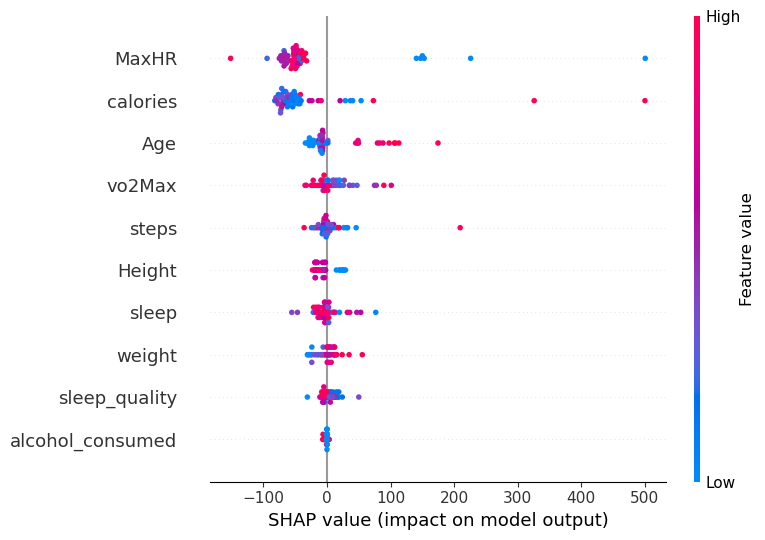

RMSE: 275.92
MAE: 111.47972697753907
R²: -0.18


In [112]:
# Training!!

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('ReadyDataset.csv')

# 'avgHR','calories','steps','speed','vo2Max','Age','Height','Gender','MaxHR','weight','alcohol_consumed','sleep','sleep_quality')
drop = ['pace', 'speed', 'avgHR', 'Gender']
features = df.drop(columns=drop).columns.tolist()
input_shape = len(features)

X = df.drop(columns=drop)
y = df.pace
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.185, random_state=62)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.185, shuffle=True)

X_train.describe()


import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500)
model.fit(X_train, y_train)

# Test model

import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)

# Use root_mean_squared_error instead of mean_squared_error with squared=False
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae}")
print(f"R²: {r2:.2f}")

In [ ]:
# Test model

import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)

# Use root_mean_squared_error instead of mean_squared_error with squared=False
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae}")
print(f"R²: {r2:.2f}")



In [78]:
y.describe()

count     270.000000
mean      522.151111
std       409.633998
min       299.380000
25%       361.497500
50%       417.480000
75%       585.730000
max      5860.810000
Name: pace, dtype: float64